<a href="https://colab.research.google.com/github/Bhavika2210/LGM-Data_Science/blob/main/Income.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [68]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression


In [69]:
data_income=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/income(1).csv")
data=data_income.copy()
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31978 entries, 0 to 31977
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            31978 non-null  int64 
 1   JobType        31978 non-null  object
 2   EdType         31978 non-null  object
 3   maritalstatus  31978 non-null  object
 4   occupation     31978 non-null  object
 5   relationship   31978 non-null  object
 6   race           31978 non-null  object
 7   gender         31978 non-null  object
 8   capitalgain    31978 non-null  int64 
 9   capitalloss    31978 non-null  int64 
 10  hoursperweek   31978 non-null  int64 
 11  nativecountry  31978 non-null  object
 12  SalStat        31978 non-null  object
dtypes: int64(4), object(9)
memory usage: 3.2+ MB


In [70]:
data.isnull().sum()

age              0
JobType          0
EdType           0
maritalstatus    0
occupation       0
relationship     0
race             0
gender           0
capitalgain      0
capitalloss      0
hoursperweek     0
nativecountry    0
SalStat          0
dtype: int64

In [71]:
data.describe()

,age,capitalgain,capitalloss,hoursperweek
count,31978.000000,31978.000000,31978.000000,31978.000000
mean,38.579023,1064.360623,86.739352,40.417850
std,13.662085,7298.596271,401.594301,12.345285
min,17.000000,0.000000,0.000000,1.000000
25%,28.000000,0.000000,0.000000,40.000000
50%,37.000000,0.000000,0.000000,40.000000
75%,48.000000,0.000000,0.000000,45.000000
max,90.000000,99999.000000,4356.000000,99.000000


In [72]:
summary_cate=data.describe(include="O")
print(summary_cate)

         JobType    EdType  ...   nativecountry                        SalStat
count      31978     31978  ...           31978                          31978
unique         9        16  ...              41                              2
top      Private   HS-grad  ...   United-States   less than or equal to 50,000
freq       22286     10368  ...           29170                          24283

[4 rows x 9 columns]


In [73]:
data['JobType'].value_counts() # tells the no. of entries per column
data['occupation'].value_counts()
# to get to know about the question marks:
np.unique(data['JobType'])
np.unique(data['occupation'])
# notice a space before a question mark
# We read the data again and consider " ?" as nan

array([' ?', ' Adm-clerical', ' Armed-Forces', ' Craft-repair',
       ' Exec-managerial', ' Farming-fishing', ' Handlers-cleaners',
       ' Machine-op-inspct', ' Other-service', ' Priv-house-serv',
       ' Prof-specialty', ' Protective-serv', ' Sales', ' Tech-support',
       ' Transport-moving'], dtype=object)

In [74]:
data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/income(1).csv",na_values=[" ?"])
data.isnull().sum()

age                 0
JobType          1809
EdType              0
maritalstatus       0
occupation       1816
relationship        0
race                0
gender              0
capitalgain         0
capitalloss         0
hoursperweek        0
nativecountry       0
SalStat             0
dtype: int64

In [75]:
# Now we need to check for those rows whose atleast one column is missing
missing=data[data.isnull().any(axis=1)]
data.isnull().sum()
# this means that 1809 are nan in jobtype and 1816 are nan in occupation. 7 have never worked,

age                 0
JobType          1809
EdType              0
maritalstatus       0
occupation       1816
relationship        0
race                0
gender              0
capitalgain         0
capitalloss         0
hoursperweek        0
nativecountry       0
SalStat             0
dtype: int64

In [76]:
data2=data.dropna(axis=0) ## we are dropping all the rows of data
correlation=data2.corr() # Helps to establish relation between independent variables
# ^ none of the values are close to 1, which means they dont have much of a correlation
# we look at the categories to check for any relation

In [77]:
correlation

,age,capitalgain,capitalloss,hoursperweek
age,1.000000,0.080154,0.060165,0.101599
capitalgain,0.080154,1.000000,-0.032229,0.080432
capitalloss,0.060165,-0.032229,1.000000,0.052417
hoursperweek,0.101599,0.080432,0.052417,1.000000


In [78]:
data2.columns

Index(['age', 'JobType', 'EdType', 'maritalstatus', 'occupation',
       'relationship', 'race', 'gender', 'capitalgain', 'capitalloss',
       'hoursperweek', 'nativecountry', 'SalStat'],
      dtype='object')

In [79]:
# to check the distribution of gender :
gender=pd.crosstab(index=data2['gender'], normalize=True, columns='count')

In [80]:
gender

col_0,count
gender,
Female,0.324315
Male,0.675685


In [81]:
# to check relation between gender and salary status: we make a two way table 
gender_salary=pd.crosstab(index=data2['gender'],columns=data2["SalStat"], margins=True, normalize=True)
gender

col_0,count
gender,
Female,0.324315
Male,0.675685


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


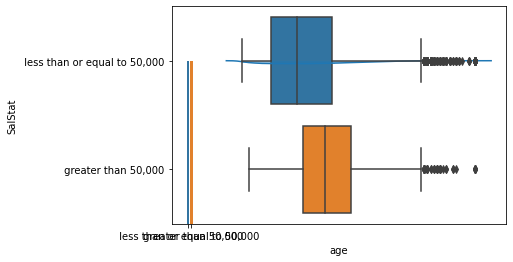

In [82]:
sal_stat=sns.countplot(data2["SalStat"])
sns.distplot(data2['age'],bins=10,kde=True)
sns.boxplot('age','SalStat', data=data2)

In [83]:
cross2=pd.crosstab(index=data2['SalStat'],columns=data2['JobType'],normalize=True,margins=True)

In [84]:
#categorizing 
data2["SalStat"]=data2['SalStat'].map({' less than or equal to 50,000':0,' greater than 50,000':1})
print(data2["SalStat"])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0        0
1        0
2        1
3        0
4        0
        ..
31973    0
31974    0
31975    0
31976    0
31977    0
Name: SalStat, Length: 30162, dtype: int64


In [85]:
new_data=pd.get_dummies(data2,drop_first=False)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


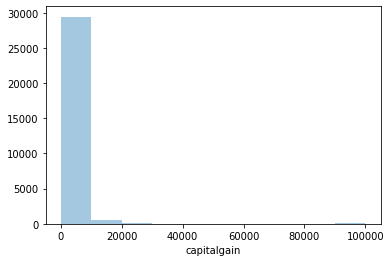

In [86]:
sns.distplot(data2['capitalgain'],bins=10,kde=False)

In [87]:
column_list=list(new_data.columns)

In [88]:
#to exclude dependent variable salstat
features=list(set(column_list)-set(['SalStat']))
y=new_data["SalStat"].values
x=new_data[features].values
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=0)

LOGISTIC REGRESSION MODEL

In [89]:
logistic=LogisticRegression()
logistic.fit(train_x,train_y)
logistic.coef_
logistic.intercept_

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


array([-1.19534595])

In [90]:
#MODEL READY !
prediction=logistic.predict(test_x)
conf=confusion_matrix(test_y,prediction)

In [91]:
conf

array([[6262,  561],
       [ 906, 1320]])

less than or equal to 50k : 6270 right, 553 wrong
greater than 50k: 905 wrong, 1321 right . The principal diagonal tells us what is right

In [92]:
#to find accuracy of our model
accuracy=accuracy_score(test_y,prediction)

In [93]:
accuracy

0.8378826389656315

# 83.88 % accurate